<a href="https://colab.research.google.com/github/RONOGIT/NEWREPO/blob/main/unswrandomfull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd# To deal with dataset
import numpy as np# To deal with Array
import matplotlib.pyplot as plt # To Deal with ploting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:

import pandas as pd

def separate_features_by_data_type(data):
    object_features = data.select_dtypes(include='object')
    binary_features = data.select_dtypes(include='bool')
    integer_features = data.select_dtypes(include='int')
    float_features = data.select_dtypes(include='float')

    return object_features, binary_features, integer_features, float_features

# Example usage:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('/content/unsw_nb15.csv')


# Separate features by data type
object_features, binary_features, integer_features, float_features = separate_features_by_data_type(df)

# Print or explore the separated features
print("Object Features:")
print(object_features.head())

print("\nBinary Features:")
print(binary_features.head())

print("\nInteger Features:")
print(integer_features.head())

print("\nFloat Features :")
print(float_features.head())




Object Features:
  proto service state attack_cat
0   udp       -   INT     Normal
1   udp       -   INT     Normal
2   udp       -   INT     Normal
3   udp       -   INT     Normal
4   udp       -   INT     Normal

Binary Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Integer Features:
   spkts  dpkts  sbytes  dbytes  sloss  dloss
0      2      0     496       0      0      0
1      2      0    1762       0      0      0
2      2      0    1068       0      0      0
3      2      0     900       0      0      0
4      2      0    2126       0      0      0

Float Features :
        dur       rate        sload  dload  sinpkt  dinpkt  sjit  djit  swin  \
0  0.000011   90909.09  180363630.0    0.0   0.011     0.0   0.0   0.0   0.0   
1  0.000008  125000.00  881000000.0    0.0   0.008     0.0   0.0   0.0   0.0   
2  0.000005  200000.00  854400000.0    0.0   0.005     0.0   0.0   0.0   0.0   
3  0.000006  166666.66  600000000.0    0.0   0.006     0.0   0.0   0.0   0.0   
4  

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preprocess_object_features(object_features):
    label_encoder = LabelEncoder()
    min_max_scaler = MinMaxScaler()

    preprocessed_object_features = object_features.copy()  # Make a copy to avoid modifying the original dataset

    # Fit label encoder and min-max scaler on each column
    for column in object_features.columns:
        # Fit label encoder
        label_encoder.fit(object_features[column])
        encoded_values = label_encoder.transform(object_features[column])

        # Fit min-max scaler
        scaled_values = min_max_scaler.fit_transform(encoded_values.reshape(-1, 1))
        scaled_values = (scaled_values * (encoded_values.max() - encoded_values.min())).astype(int)

        # Replace values in the original dataset with scaled values
        preprocessed_object_features[column] = scaled_values

    return preprocessed_object_features

# Example usage:
# Assuming you have a DataFrame df with object features
preprocessed_object_features = preprocess_object_features(df)

# Print or explore the preprocessed object features
print("Preprocessed Object Features:")
print(preprocessed_object_features.head())
print(type(preprocessed_object_features))


Preprocessed Object Features:
   dur  proto  service  state  spkts  dpkts  sbytes  dbytes   rate  sload  \
0   11    118        0      4      1      0     209       0  48012  49503   
1    8    118        0      4      1      0     856       0  48018  50421   
2    5    118        0      4      1      0     506       0  48021  50408   
3    6    118        0      4      1      0     421       0  48020  50142   
4   10    118        0      4      1      0    1027       0  48015  50404   

   ...  trans_depth  response_body_len  ct_src_dport_ltm  ct_dst_sport_ltm  \
0  ...            0                  0                 0                 0   
1  ...            0                  0                 0                 0   
2  ...            0                  0                 0                 0   
3  ...            0                  0                 1                 0   
4  ...            0                  0                 1                 0   

   is_ftp_login  ct_ftp_cmd  ct_flw_ht

In [ ]:
    df1=df.copy()

    df1.update(preprocessed_object_features)


    # Save the modified dataset
    df1.to_csv('/content/preprocessed_data.csv', index=False)

In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your actual file path)


# Iterate over each column and print its name and data type
print("Column Name\tData Type")
for column in df1.columns:
    print(f"{column}\t\t{df1[column].dtype}")



Column Name	Data Type
dur		float64
proto		object
service		object
state		object
spkts		int64
dpkts		int64
sbytes		int64
dbytes		int64
rate		float64
sload		float64
dload		float64
sloss		int64
dloss		int64
sinpkt		float64
dinpkt		float64
sjit		float64
djit		float64
swin		int64
stcpb		int64
dtcpb		int64
dwin		float64
tcprtt		float64
synack		float64
ackdat		float64
smean		float64
dmean		float64
trans_depth		float64
response_body_len		float64
ct_src_dport_ltm		float64
ct_dst_sport_ltm		float64
is_ftp_login		float64
ct_ftp_cmd		float64
ct_flw_http_mthd		float64
is_sm_ips_ports		float64
attack_cat		object
label		float64


In [ ]:
# Load your dataset (replace 'dataset.csv' with the actual file path)
df = pd.read_csv('/content/preprocessed_data.csv')

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean for training, validation, and test sets
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)


In [ ]:
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
X_train


Training cases: 18544
Test cases: 4636


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat
8678,7.0,117,0,3,1,0,51,0,5600.0,5687.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
12893,9.0,117,2,3,1,0,19,0,5598.0,5626.0,...,0.0,0.0,0.0,26.0,14.0,0.0,0.0,0.0,0.0,5
22842,9.0,117,2,3,1,0,19,0,5598.0,5626.0,...,0.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,5
4877,517.0,111,5,2,6,4,291,448,4605.0,4157.0,...,148.0,1.0,230.0,0.0,0.0,0.0,0.0,1.0,0.0,3
19024,3.0,117,2,3,1,0,19,0,5604.0,5708.0,...,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9.0,117,2,3,1,0,19,0,5598.0,5626.0,...,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,5
21575,8.0,117,2,3,1,0,19,0,5599.0,5633.0,...,0.0,0.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,5
5390,8.0,118,0,3,1,0,51,0,5599.0,5676.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3
860,4021.0,111,5,2,6,4,220,21,629.0,863.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [ ]:
print(y_train.head())

8678     1.0
12893    1.0
22842    1.0
4877     1.0
19024    1.0
Name: label, dtype: float64


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators= 150, max_features='auto', criterion= 'gini', random_state= 0)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       1.00      1.00      1.00      4598

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636



In [ ]:
from sklearn.metrics import accuracy_score


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute precision and recall
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
import pandas as pd

# Create a DataFrame with the test data and predicted labels
data_with_predictions = pd.DataFrame(X_test, columns=X_test.columns)
data_with_predictions['predicted_label'] = y_pred

# Filter the data labeled as "0"
anomaly_data = data_with_predictions[data_with_predictions['predicted_label'] == 0]

# Save the anomaly data to a CSV file
anomaly_data.to_csv('anomaly_data.csv', index=False)


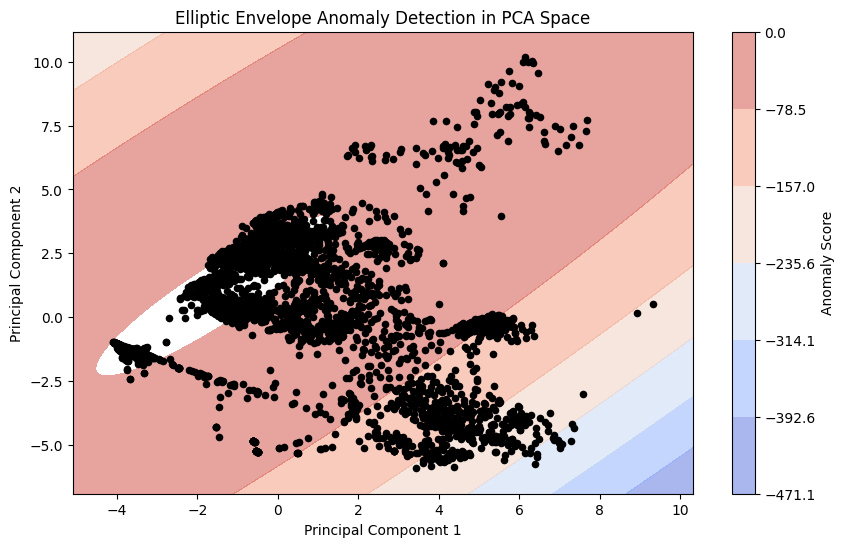

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

# Load your dataset
data = pd.read_csv('/content/anomaly_data.csv')

# Normalize the data (important for PCA)
scaler = StandardScaler()
scaler.fit(data)
data_normalized = scaler.transform(data)

# Initialize PCA with desired number of components
n_components = 2  # Choose the number of components you want for visualization
pca = PCA(n_components=n_components)

# Fit PCA on the normalized data
pca.fit(data_normalized)

# Transform the data using PCA
data_pca = pca.transform(data_normalized)

# Initialize Elliptic Envelope for outlier detection
envelope = EllipticEnvelope(contamination=0.5)  # You can adjust the contamination parameter

# Fit the Elliptic Envelope model on the PCA-transformed data
envelope.fit(data_pca)


# Create meshgrid for visualization
x_min, x_max = data_pca[:, 0].min() - 1, data_pca[:, 0].max() + 1
y_min, y_max = data_pca[:, 1].min() - 1, data_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict anomaly scores for meshgrid points
Z = envelope.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the anomaly scores
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, levels=np.linspace(Z.min(), 0, 7), alpha=0.5)
plt.colorbar(label='Anomaly Score')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='black', edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Elliptic Envelope Anomaly Detection in PCA Space')
plt.show()


In [ ]:
print(true_labels)
print(predicted_labels)
print(type(true_labels))
print(type(predicted_labels))
num_classes = len(np.unique(true_labels))
print(num_classes)
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


[1 1 1 ... 1 1 1]
[ 1  1  1 ...  1 -1 -1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
